Analyzing IMDB dataset moview reviews. Using Keras to determine is moview review was Positive(1) or Negative(0)

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import imdb

Loading training data and test data

In [9]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

**train_data** 
Represents an array of numbers which essentially indexes of words.

In [10]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [11]:
word_indexes = imdb.get_word_index()

In [12]:
word_indexes

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

This dictionary is not very helpful for us to decode review. Thus it will be nice to reverse it.

In [30]:
reversed_word_indexes = dict([(val, key) for (key, val) in word_indexes.items()])

Quick and easy function to decode review. Note we need to have offset of 3, (1. Padding, 2. Start of sequence, 3. Unknown) otherwise review will not make any sense.

In [54]:
def decode_review(sequence, reversed_word_indexes):
    review = ' '.join([reversed_word_indexes.get(i - 3, '?') for i in sequence])
    return review

In [55]:
review = decode_review(train_data[0], reversed_word_indexes)

In [56]:
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

This is an Example of decoded review. 

#### Preparing data

Now that we know what those numbers represent, we can prepare our data to be passed to keras. We need to convers single dimension array into numpy matrix. Which is called One hot encoding

In [69]:
import numpy as np

def vectorize_data(sequences, dimensions=10000):
    matrix = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
            matrix[i, sequence] = 1
    return matrix
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)

In [70]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

For labels we can just convert it into numpy array of float32 numbers

In [71]:
y_train = np.asarray(train_labels).astype('float32')
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [72]:
y_test = np.asarray(test_labels).astype('float32')
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

#### Creating our model

Now that we have our data prepared, we can start working on our Keras model. 
We will have 2 Dense layers of 16 NN nodes with activation function 'relu' and last Dense layer will be our output layer of dense 1 with activation function 'sigmoid' 

In [73]:
from keras import layers, models

In [76]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Next we need to compile our model and for that we need to provide 3 parameters:
 1. optimizer function
 2. loss function
 3. metrics 
In our case optimizer 'rmsprop'
loss_function will be 'binary_crossentropy' because we are dealing with binary classification where output can only be 0 or 1
metrics will be 'accuracy'

In [78]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

Next step is to validate our approach and see if our model works. For that we will run validation process deviving train data into sets of 10000 items

In [81]:
x_val = x_train[:10000]
x_partial_train = x_train[10000:]

y_val = y_train[:10000]
y_partial_train = y_train[10000:]

In [82]:
print(len(x_val), len(x_partial_train))

10000 15000


In [83]:
history = model.fit(x_partial_train, y_partial_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 252us/step - loss: 0.5095 - acc: 0.7901 - val_loss: 0.3739 - val_acc: 0.8740
Epoch 2/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.3043 - acc: 0.8991 - val_loss: 0.3152 - val_acc: 0.8803
Epoch 3/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.2253 - acc: 0.9235 - val_loss: 0.2851 - val_acc: 0.8866
Epoch 4/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.1759 - acc: 0.9435 - val_loss: 0.2757 - val_acc: 0.8903
Epoch 5/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.1443 - acc: 0.9535 - val_loss: 0.3239 - val_acc: 0.8743
Epoch 6/20
15000/15000 [==============================] - 1s 77us/step - loss: 0.1193 - acc: 0.9640 - val_loss: 0.2945 - val_acc: 0.8862
Epoch 7/20
15000/15000 [==============================] - 1s 76us/step - loss: 

Training is done, let's now see if our model overfits and see how we can takle model to improve its result

In [84]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

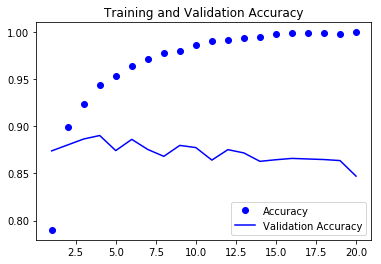

In [89]:
import matplotlib.pyplot as plt

history_dict = history.history
accuracy = history_dict['acc']
validation_accuracy = history_dict['val_acc']

loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, 'bo', label='Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

As you can see above our training accuracy keeps growing with every epoch, up to 99% however validation accuracy peaks on 4th epoch and then starts to overfit.

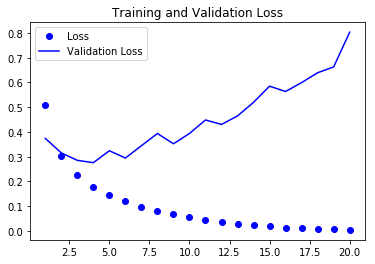

In [90]:
plt.clf()

plt.plot(epochs, loss, 'bo', label='Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Same applies to loss metrics. Loss going down to 0 with each epoch, however validation loss overfits after 4th epoch.

#### Finally
Let's train our model with final train and testing data for 4 epochs and see our final results

In [92]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 55us/step - loss: 0.4470 - acc: 0.8242
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.2557 - acc: 0.9103
Epoch 3/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.1969 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 1s 50us/step


In [93]:
result

[0.3179986201286316, 0.87512]

This was a fairly naive approach, but even with this approach I managed to get 88% accuracy.

In [94]:
model.predict(x_test)

array([[0.29397136],
       [0.9996812 ],
       [0.9375764 ],
       ...,
       [0.16675383],
       [0.15830699],
       [0.7685168 ]], dtype=float32)

Trying to change number of hidden units in input layers and Number of Layers to see what effect it has on model accuracy.

In [95]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.4418 - acc: 0.8109
Epoch 2/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.2470 - acc: 0.9110
Epoch 3/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.1903 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 1s 44us/step


In [96]:
result

[0.31386076488494874, 0.87996]

In [97]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.4393 - acc: 0.8281
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.2686 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.2131 - acc: 0.9262
Epoch 4/4
25000/25000 [==============================] - 1s 42us/step


In [98]:
result

[0.2848528031826019, 0.88668]

In [99]:
model.predict(x_test)

array([[0.22009897],
       [0.99956304],
       [0.8150622 ],
       ...,
       [0.13442782],
       [0.06842265],
       [0.45911583]], dtype=float32)

In [101]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.1688 - acc: 0.7778
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.0837 - acc: 0.9064
Epoch 3/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.0615 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 1s 44us/step


In [102]:
result

[0.08502628820419311, 0.8856]

Changing loss function to 'mse' and decreasing number of layers in the model increased accuracy. Now lets try to combine them and see our result

In [103]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)
result

Epoch 1/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.1405 - acc: 0.8253
Epoch 2/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.0788 - acc: 0.9132
Epoch 3/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.0613 - acc: 0.9306
Epoch 4/4
25000/25000 [==============================] - 1s 43us/step


[0.08568406512260437, 0.88636]

Didn't work out as expected now lets try to increse number of hidden layers

In [104]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)
result

Epoch 1/4
25000/25000 [==============================] - 1s 58us/step - loss: 0.1399 - acc: 0.8160: 0s - loss: 0.1485 - acc: 0.8
Epoch 2/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.0726 - acc: 0.9111
Epoch 3/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.0553 - acc: 0.9318
Epoch 4/4
25000/25000 [==============================] - 1s 43us/step


[0.08857040420293807, 0.88048]

Not lets minimize number of hidden layers to 4

In [105]:
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)
result

Epoch 1/4
25000/25000 [==============================] - 1s 57us/step - loss: 0.1969 - acc: 0.7988
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.1309 - acc: 0.8807
Epoch 3/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.0973 - acc: 0.9037
Epoch 4/4
25000/25000 [==============================] - 1s 45us/step


[0.09446858428239822, 0.88424]

Now lets try to use 'tanh' activation function instead of 'relu'

In [109]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)
result

Epoch 1/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.4106 - acc: 0.8282
Epoch 2/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.2307 - acc: 0.9119
Epoch 3/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.1779 - acc: 0.9342
Epoch 4/4
25000/25000 [==============================] - 1s 47us/step


[0.3290228146791458, 0.87608]

In [118]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)

result = model.evaluate(x_test, y_test)
result

Epoch 1/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.1753 - acc: 0.7570
Epoch 2/4
25000/25000 [==============================] - 1s 50us/step - loss: 0.1051 - acc: 0.8764
Epoch 3/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.0801 - acc: 0.9063
Epoch 4/4
25000/25000 [==============================] - 1s 50us/step


[0.08422688279509544, 0.88552]